### Supervised Learning: Logistic Regression
#### Overview
In this section we will be learning about logistic regression. In this section we will be using Logistic Regression to perform classification of a data set. In this lecture, we will focus on binary classification, so that we have two outputs, a positive and negative, (1 or 0). To give some examples of what we mean by binary: we could classify email as either spam or not spam, or tumors as either malignant or benign. In both these cases we have a set of data and features, but only two possible outputs. It is possible to have more than just two classes, but for now we will focus on binary classification.  

In order to perform this classification we will be using the logistic function to perform logistic regression.  

Here is an overview of what we will do throughout this lecture:  
1. Basic Mathematical Overview of the Logistic Function  
2. Extra Math Resources  
3. DataSet Analysis   
4. Data Visualization  
5. Data Preparation  
6. Multicollinearity Consideration  
7. Logistic Regression with SciKit Learn  
8. Testing and Training Data Sets  
9. Conclusion and More Resources  

Now we'll start with our imports before continuing the lecture (this is because we want to plot some things in our explanation).  

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

import statsmodels.api as sm


Module Install Notice!
You'll need to install a new module we haven't used before: Statsmodels.
You can install it with 'pip install statsmodels' or 'conda install statsmodels' depending on your Python installation. In this lecture we will only be using a dataset from it, but it can do quite a bit, including many statistical computations that SciKit Learn does.


#### Part 1: Basic Mathematical Overview
First, let's take a look at the Logistic Function. The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as: $$ \sigma (t)= \frac{1}{1+e^{-t}}$$
A graph of the logistic function looks like this (following code):


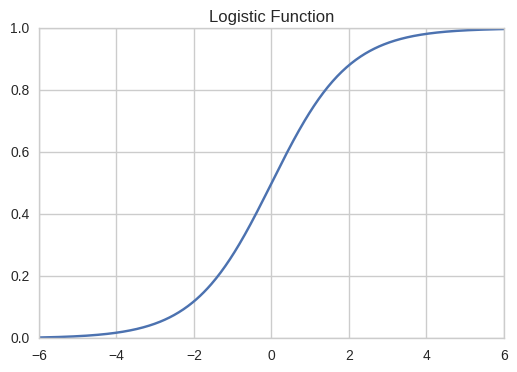

In [4]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

# Set t from -6 to 6 (500 elements, linearly spaced)
t = np.linspace(-6, 6, 500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# plot
plt.plot(t, y)
plt.title('Logistic Function')

If we remember back to the Linear Regression Lectures, we could describe a Linear Regression Function model as: $$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$
Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form: $$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$
For our logistic function, if we view t as a linear function with a variable x we could express t as: $$ t = \beta _0 + \beta _1 x $$
Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as: $$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$
Now we can interpret F(x) as the probability that the dependent variable is a "success" case, this is a similar style of thinking as in the Binomial Distribution, in which we had successes and failures. So the formula for F(x) that we have here states that the probability of the dependent variable equaling a "success" case is equal to the value of the logistic function of the linear regression expression (the linear equation we used to replace t ).
Inputting the linear regression expression into the logistic function allows us to have a linear regression expression value that can vary from positive to negative infinity, but after the transformation due to the logistic expression we will have an output of F(x) that ranges from 0 to 1.
We can now perform a binary classification based on where F(x) lies, either from 0 to 0.5, or 0.5 to 1.

### Part 2: Extra Math Resources  
This is a very basic overview of binary classification using Logistic Regression, if you're still interested in a deeper dive into the mathematics, check out these sources:  
1.) [Andrew Ng's class notes on Logistic Regression (Note: Scroll down)](http://cs229.stanford.edu/notes/cs229-notes1.pdf)  
2.) [CMU notes Note: Advanced math notation.](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)  
3.) [Wikipedia has a very extensive look at logistic regression.](https://en.wikipedia.org/wiki/Logistic_regression)    
Scroll down to the bottom for more resources similar to this lecture!  

#### Part 3: Dataset Analysis
Let us go ahead and take a look at the dataset  
The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:  
Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.
It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.  
We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.  
In this case we will approach this as a classification problem by asking the question:

*Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair? * 

DataSet Description  
From the Statsmodels website we have the following information about the data:  
Number of observations: 6366 Number of variables: 9 Variable name definitions:  
rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
age             : Age
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
children        : No. children
religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
occupation_husb : Husband's occupation. Same as occupation.
affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

 **Why a Statsmodels data set?** So you can have the option of working through additional example datasets included in SciKit Learn and their own tutorials.  
#### Part 4: Data Visualization
Now that we've done a quick overview of some math and the data we will be working with, let's go ahead and dive into the code!  
We will start with loading the data and visualizing it.

In [6]:
df = sm.datasets.fair.load_pandas().data # loading data in Statsmodels module

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [10]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [11]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [13]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


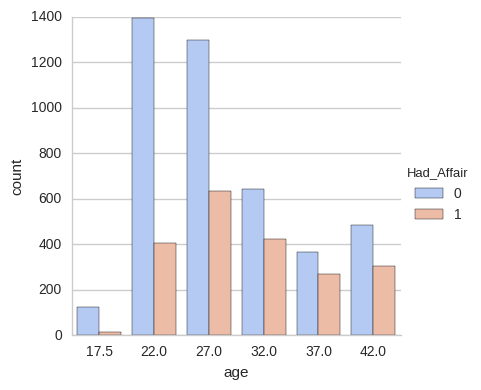

In [15]:
sns.factorplot('age', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

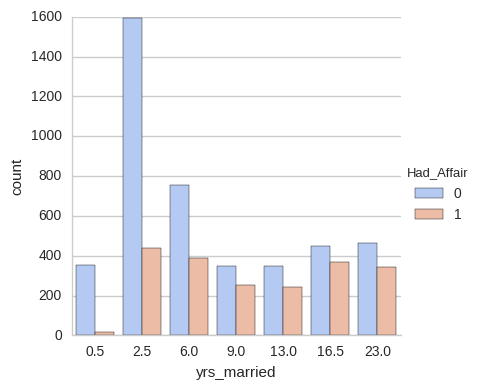

In [17]:
sns.factorplot('yrs_married', data=df, hue='Had_Affair', palette='coolwarm',kind='count')

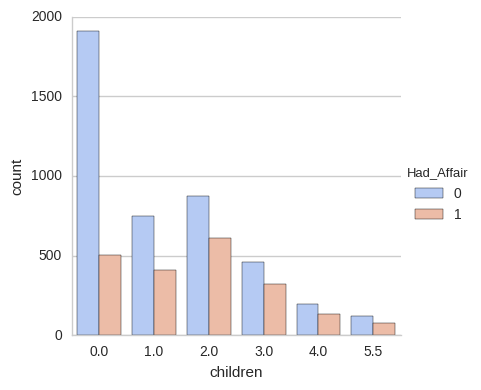

In [18]:
sns.factorplot('children', data=df, hue='Had_Affair', palette='coolwarm',kind='count')

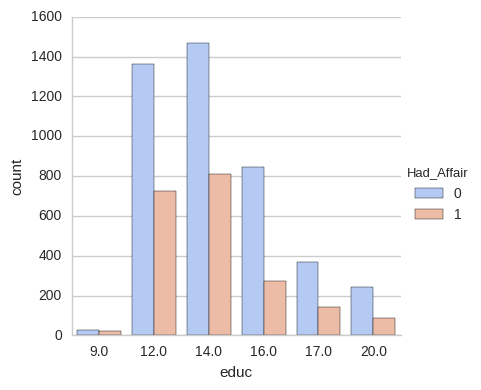

In [19]:
sns.factorplot('educ', data=df, hue='Had_Affair', palette='coolwarm',kind='count')

#### Part 5: Data Preparation (categorical)
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) and creating new columns from them.

In [20]:
occ_dummies = pd.get_dummies(df['occupation'])

In [21]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [22]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [23]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [24]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [32]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [27]:
dummies = pd.concat([occ_dummies,hus_occ_dummies], axis=1)

In [29]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [33]:
X = pd.concat([X, dummies],axis=1)

In [34]:
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,0,0,0,0,1,0,0,0,0,1,0,0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,0,1,0,0,0,0,0,0,1,0,0,0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,0,0,1,0,0,0,0,0,1,0,0,0
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333,0,0,1,0,0,0,0,0,0,0,1,0


In [36]:
Y = df.Had_Affair
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

#### Part 6: Multicollinearity Consideration.
Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity). Multicollinearity occurs due to the dummy variables) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.  

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [39]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

In [40]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [41]:
X = X.drop('affairs', axis=1)

In [42]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [43]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [44]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0])

In [46]:
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

0.72588752748978946

In [48]:
Y.mean() # % weman has affair

0.32249450204209867

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the **[null error rate](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)**.

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.  
Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.